In [11]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from benchmarkfcns import *
import pandas as pd

# Benchmark functions

## unimodal

### 2D

In [40]:
unimodal_functions2D = {
    "AckleyN2": [ackleyn2, [-32, 32]],
    "BohachevskyN1": [bohachevskyn1, [-100, 100]],
    "Booth": [booth, [-10, 10]],
    "Brent": [brent, [-20, 0]], 
    "dropwave": [dropwave, [-5.2, 5.2]], 
    "Exponential": [exponential, [-1, 1]], 
    "Leon": [leon, [0, 10]],
    "Matyas": [matyas, [-10, 10]],
    "SchafferN1": [schaffern1, [-100, 100]],
    "SchafferN2": [schaffern2, [-100, 100]],
    "SchafferN3": [schaffern3, [-100, 100]],
    "SchafferN4": [schaffern4, [-100, 100]],
    "ThreeHumpCamel": [threehumpcamel, [-5, 5]]
}

### nD

In [ ]:
unimodal_functions30D = {
    "Brown": [brown, [-1, 4]],
    "Griewank": [griewank, [-600, 600]],
    "PowellSum": [powellsum, [-1, 1]],
    "Ridge": [ridge, [-5, 5]],
    "Schwefel2_20": [schwefel220, [-100, 100]],
    "Schwefel2_21": [schwefel221, [-100, 100]],
    "Schwefel2_22": [schwefel222, [-100, 100]],
    "Schwefel2_23": [schwefel223, [-10, 10]],
    "Sphere": [sphere, [-5.2, 5.2]],
    "SumSquares": [sumsquares, [-10, 10]],
    "Trid": [trid, [-10, 10]],
    "XinSheYangN3": [xinsheyangn3, [(-2)*np.pi, 2*np.pi]],
    "Zakharov": [zakharov, [-5, 10]]
}

## multimodal

### 1D

In [42]:
multimodal_1d = {
    "Forrester": [forrester, [0, 1]],
    "Gramacy & Lee": [gramacylee, [0.5, 2.5]]
}

### 2D

In [ ]:
multimodal_2d = {
    "Adjiman": [adjiman, [-1, 2]],  # x1 in [-1,2], x2 in [-1,1] — simplified
    "Bartels Conn": [bartelsconn, [-500, 500]],
    "Beale": [beale, [-4.5, 4.5]],
    "Bird": [bird, [-2*math.pi, 2*math.pi]],
    "Bohachevsky N. 2": [bohachevskyn2, [-100, 100]],
    "Bukin N. 6": [bukinn6, [-15, -5]],  # x1 range, x2 in [-3,3]
    "Carrom Table": [carromtable, [-10, 10]],
    "Cross-in-Tray": [crossintray, [-10, 10]],
    "Deckkers-Aarts": [deckkersaarts, [-20, 20]],
    "Easom": [easom, [-100, 100]],
    "Egg Crate": [eggcrate, [-5, 5]],
    "El-Attar-Vidyasagar-Dutta": [elattar, [-500, 500]],
    "Goldstein-Price": [goldsteinprice, [-2, 2]],
    "Himmelblau": [himmelblau, [-5, 5]],
    "Holder-Table": [holdertable, [-10, 10]],
    "Keane": [keane, [0, 10]],
    "Levi N. 13": [levin13, [-10, 10]],
    "McCormick": [mccormick, [-1.5, 4]],  # x1 range, x2 in [-3,4]
    "Shubert 3": [shubertn3, [-10, 10]],
    "Shubert N. 4": [shubertn4, [-10, 10]],
    "Shubert": [shubert, [-10, 10]]                 
}

### 3D

In [ ]:
multimodal_3d = {
    "Wolfe": [wolfe, [0, 2]]        
}

### nD

In [45]:
multimodal_30d = {
    "Alpine N. 1": [alpinen1, [0, 10]],
    "Alpine N. 2": [alpinen2, [0, 10]],
    "Happy Cat": [happycat, [-2, 2]],
    "Periodic": [periodic, [-10, 10]],
    "Qing": [qing, [-500, 500]],
    "Quartic": [quartic, [-1.28, 1.28]],
    "Rastrigin": [rastrigin, [-5.12, 5.12]],
    "Rosenbrock": [rosenbrock, [-5, 10]],
    "Salomon": [salomon, [-100, 100]],
    "Schwefel": [schwefel, [-500, 500]],
    "Styblinski-Tank": [styblinskitank, [-5, 5]],
    "Xin-She Yang": [xinsheyangn2, [-5, 5]],
    "Xin-She Yang N. 2": [xinsheyangn2, [-2*math.pi, 2*math.pi]],
    "Xin-She Yang N. 4": [xinsheyangn4, [-10, 10]],
    "Ackley": [ackley, [-32.768, 32.768]],
    "Ackley N. 4": [ackleyn4, [-32, 32]]  
}

# GA

In [ ]:
class Chromosome:
    def __init__(self, values):
        self.values = np.array(values)
        self.fitness = None

    def __repr__(self):
        return f"({self.values})"

def initialize_population(pop_size, bounds, dimension):
    population = []
    for _ in range(pop_size):
        values = np.random.uniform(bounds[0], bounds[1], dimension)
        population.append(Chromosome(values))
    return population

def evaluate_population(population, func):
    for chrom in population:
        chrom.fitness = func([chrom.values])

def selection(population, tournament_size=3):
    selected = random.sample(population, tournament_size)
    return min(selected, key=lambda chrom: chrom.fitness)

def crossover(parent1, parent2, crossover_rate, dimension):
    if random.random() < crossover_rate:
        # Blend crossover for real numbers
        alpha = random.random()
        child_values = alpha * parent1.values + (1 - alpha) * parent2.values
        return Chromosome(child_values)
    else:
        return random.choice([parent1, parent2])

def mutation(chrom, mutation_rate, bounds, dimension):
    if random.random() < mutation_rate:
        # Add small random value to each dimension
        mutation_values = np.random.uniform(-0.3, 0.3, dimension) * (bounds[1] - bounds[0])
        chrom.values += mutation_values
        # Ensure within bounds
        chrom.values = np.clip(chrom.values, bounds[0], bounds[1])
    return chrom

def create_new_generation(previous_gen, crossover_rate, mutation_rate, bounds, func, dimension):
    new_gen = []
    # Elitism: keep the best chromosome
    best_chrom = min(previous_gen, key=lambda chrom: chrom.fitness)
    new_gen.append(Chromosome(best_chrom.values.copy()))
    
    while len(new_gen) < len(previous_gen):
        parent1 = selection(previous_gen)
        parent2 = selection(previous_gen)
        child = crossover(parent1, parent2, crossover_rate, dimension)
        child = mutation(child, mutation_rate, bounds, dimension)
        new_gen.append(child)
    
    return new_gen

def genetic_algorithm(func, bounds, dimension=30, pop_size=50, crossover_rate=0.75, mutation_rate=0.01, max_generation=40000, patience=1000):
    population = initialize_population(pop_size, bounds, dimension)
    evaluate_population(population, func)

    best_chrom = min(population, key=lambda chrom: chrom.fitness)
    best_fitness = best_chrom.fitness
    best_fitness_per_generation = [best_fitness]

    no_improve_count = 0

    for gen in range(1, max_generation + 1):
        population = create_new_generation(population, crossover_rate, mutation_rate, bounds, func, dimension)
        evaluate_population(population, func)

        current_best = min(population, key=lambda chrom: chrom.fitness)

        if current_best.fitness < best_fitness:
            best_fitness = current_best.fitness
            best_chrom = current_best
            no_improve_count = 0
        else:
            no_improve_count += 1

        best_fitness_per_generation.append(best_fitness)

        if no_improve_count >= patience:
            print(f"Early stopping at generation {gen} (no improvement in {patience} generations)")
            break

    return best_chrom, best_fitness_per_generation

# GA results

## uni

### 2D

Running GA on AckleyN2...
Early stopping at generation 10032 (no improvement in 10000 generations)
Best solution for AckleyN2: [ 2.43309827e-05 -1.24794178e-06] with fitness [-199.99990255]
Running GA on BohachevskyN1...
Early stopping at generation 10011 (no improvement in 10000 generations)
Best solution for BohachevskyN1: [ 0.0164947  -0.04652272] with fitness [0.07465027]
Running GA on Booth...
Early stopping at generation 14634 (no improvement in 10000 generations)
Best solution for Booth: [1.00035179 2.99880113] with fitness [4.43124863e-06]
Running GA on Brent...
Early stopping at generation 13873 (no improvement in 10000 generations)
Best solution for Brent: [-9.99999855 -9.99997656] with fitness [5.51403321e-10]
Running GA on Exponential...
Early stopping at generation 12215 (no improvement in 10000 generations)
Best solution for Exponential: [5.00335902e-05 3.45041171e-04] with fitness [-0.99999994]
Running GA on Leon...
Early stopping at generation 13573 (no improvement in 1

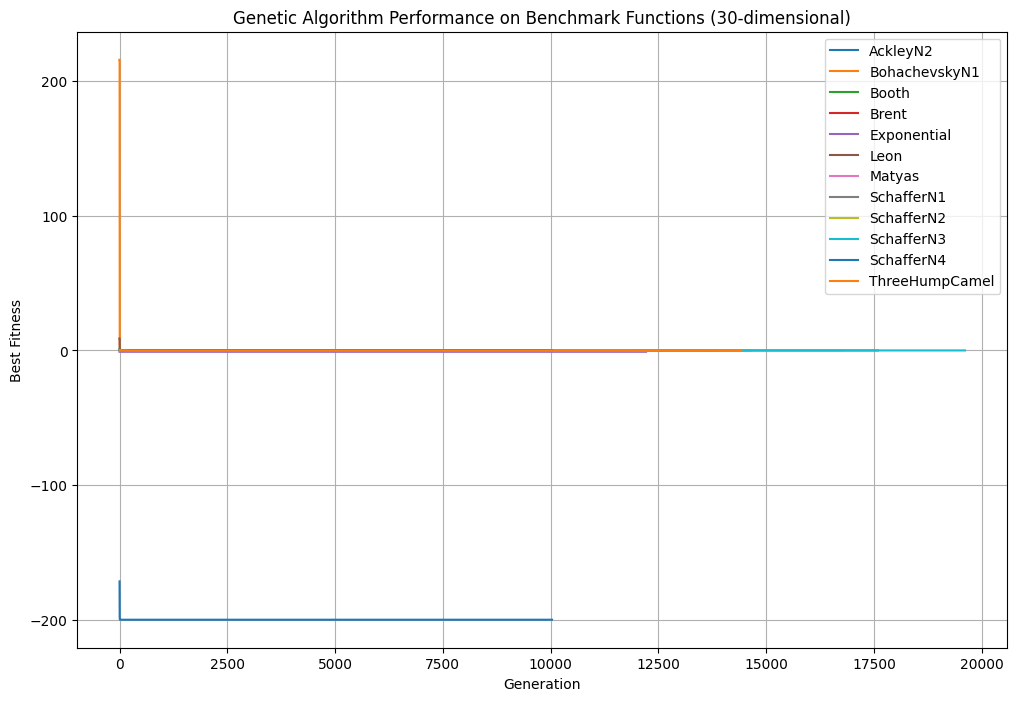

In [5]:
dimension = 2
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 10000

results = {}
for name, [func, bounds] in unimodal_functions2D.items():
    print(f"Running GA on {name}...")
    best_sol, fitness_history = genetic_algorithm(
        func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness'][0]:.6e}")


Summary Results:
AckleyN2            : Best Fitness = -1.999999e+02
BohachevskyN1       : Best Fitness = 7.465027e-02
Booth               : Best Fitness = 4.431249e-06
Brent               : Best Fitness = 5.514033e-10
Exponential         : Best Fitness = -9.999999e-01
Leon                : Best Fitness = 2.530220e-02
Matyas              : Best Fitness = 1.072952e-12
SchafferN1          : Best Fitness = 4.161745e-07
SchafferN2          : Best Fitness = 4.838123e-04
SchafferN3          : Best Fitness = 2.129515e-03
SchafferN4          : Best Fitness = 2.925787e-01
ThreeHumpCamel      : Best Fitness = 8.867530e-07


#### statistics

In [ ]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in unimodal_functions2D.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running GA on {name}...")
        best_sol, fitness_history = genetic_algorithm(
            func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
        )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))

Running GA on AckleyN2...
Early stopping at generation 12419 (no improvement in 10000 generations)
Best solution for AckleyN2: [0.00298746 0.00266935] with fitness [-199.98397547]
Running GA on AckleyN2...
Early stopping at generation 10044 (no improvement in 10000 generations)
Best solution for AckleyN2: [-1.50074411e-08  8.64995418e-09] with fitness [-199.99999993]
Running GA on AckleyN2...
Early stopping at generation 28405 (no improvement in 10000 generations)
Best solution for AckleyN2: [0.00305419 0.00042296] with fitness [-199.98766705]
Running GA on AckleyN2...
Early stopping at generation 28604 (no improvement in 10000 generations)
Best solution for AckleyN2: [ 0.00187068 -0.00379095] with fitness [-199.98309118]
Running GA on AckleyN2...
Early stopping at generation 10023 (no improvement in 10000 generations)
Best solution for AckleyN2: [0.00455381 0.00883778] with fitness [-199.96023592]
Running GA on AckleyN2...
Early stopping at generation 10009 (no improvement in 10000 ge

#### table

In [ ]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])
df

In [ ]:
df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

In [15]:
df

,bench_func,avg,std,median
0,AckleyN2,-199.967577,0.041822,-1.999838e+02
1,BohachevskyN1,0.068214,0.130286,1.662379e-02
2,Booth,0.000052,0.000088,5.754207e-06
3,Brent,0.390872,1.703700,5.611130e-06
4,Exponential,-0.991872,0.035427,-1.000000e+00
5,Leon,0.004027,0.011780,4.843075e-04
6,Matyas,0.000004,0.000014,6.489714e-09
7,SchafferN1,0.000130,0.000543,1.846583e-06
8,SchafferN2,0.025225,0.109292,1.742774e-06
9,SchafferN3,0.002755,0.002152,1.984296e-03


### nD

Running GA on Brown...
Best solution for Brown: [ 0.09734211  0.00176946  0.06224327  0.00767561  0.0217749  -0.03188286
 -0.03169519  0.00909693  0.04171948  0.05430989  0.03790537 -0.05090409
 -0.04474258 -0.02772258  0.05050879 -0.00429841  0.01327896 -0.0002806
  0.05305681  0.03976979 -0.08063367 -0.00665562  0.01771114  0.03955032
  0.03226654  0.0096024  -0.01789112  0.00811686 -0.01192761  0.14563102] with fitness [0.10060396]
Running GA on Griewank...
Best solution for Griewank: [ -6.36644575   3.41930286 -20.42749701 -12.47859978  21.68946609
  -4.46823117   5.48504364   6.05702494   0.19976034  -0.97041061
  -7.59007414 -32.50586216   9.82755235  -2.13723794 -17.16734002
 -18.22898645   1.62887541   5.56273714  10.29897976   0.377766
 -25.84961564 -15.60882346 -13.23698892  10.19209322   2.16517854
  10.81859137  -0.44859046  -7.25272184   1.24821871  -6.99474902] with fitness [2.14538557]
Running GA on PowellSum...
Best solution for PowellSum: [-5.60112236e-04 -1.17568339e-

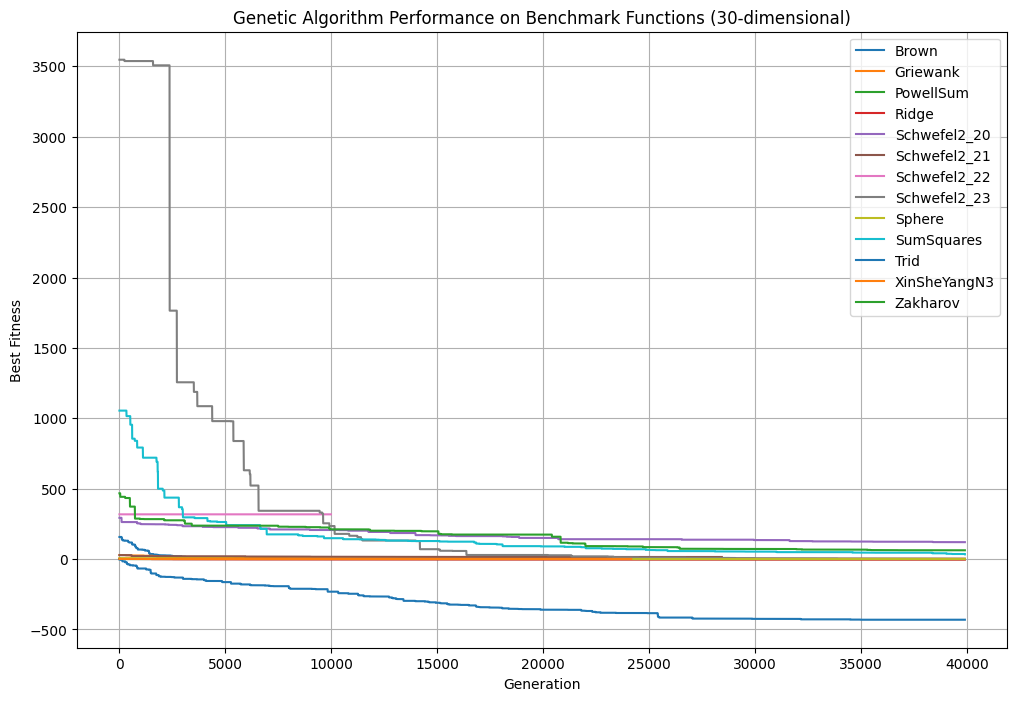

In [ ]:
dimension = 30
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 10000

results = {}
for name, [func, bounds] in unimodal_functions30D.items():
    print(f"Running GA on {name}...")
    
    best_sol, fitness_history = genetic_algorithm(
        func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'][100:], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

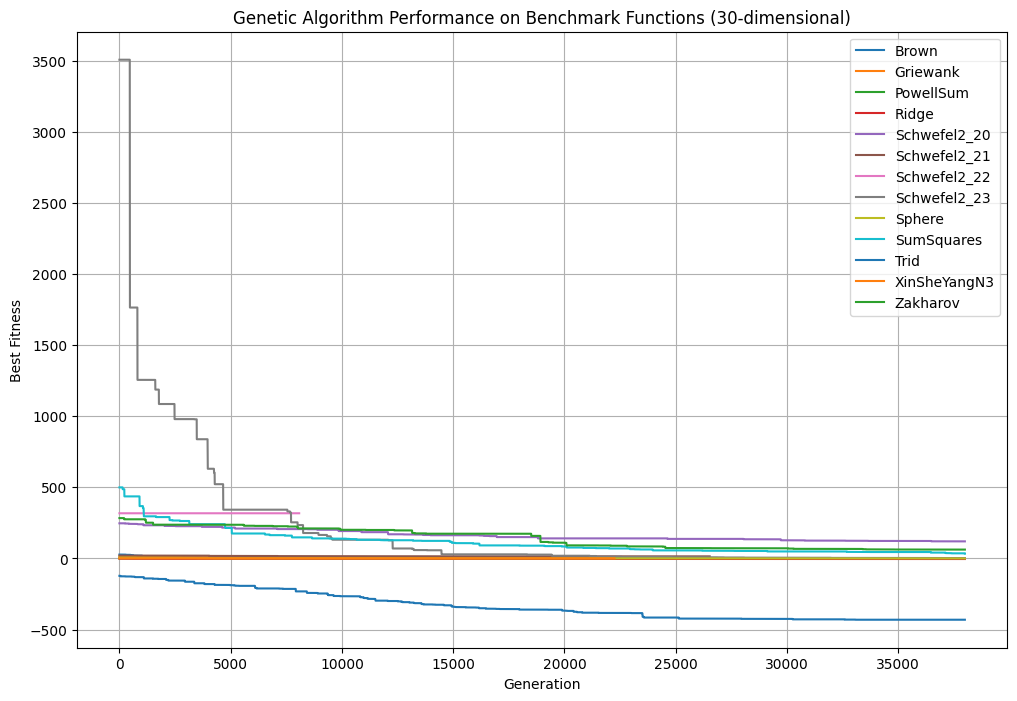

In [ ]:
# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'][2000:], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness'][0]:.6e} : \n Best Solution = {data['best_solution']}")


Summary Results:
Brown               : Best Fitness = 1.006040e-01 : 
 Best Solution = [ 0.09734211  0.00176946  0.06224327  0.00767561  0.0217749  -0.03188286
 -0.03169519  0.00909693  0.04171948  0.05430989  0.03790537 -0.05090409
 -0.04474258 -0.02772258  0.05050879 -0.00429841  0.01327896 -0.0002806
  0.05305681  0.03976979 -0.08063367 -0.00665562  0.01771114  0.03955032
  0.03226654  0.0096024  -0.01789112  0.00811686 -0.01192761  0.14563102]
Griewank            : Best Fitness = 2.145386e+00 : 
 Best Solution = [ -6.36644575   3.41930286 -20.42749701 -12.47859978  21.68946609
  -4.46823117   5.48504364   6.05702494   0.19976034  -0.97041061
  -7.59007414 -32.50586216   9.82755235  -2.13723794 -17.16734002
 -18.22898645   1.62887541   5.56273714  10.29897976   0.377766
 -25.84961564 -15.60882346 -13.23698892  10.19209322   2.16517854
  10.81859137  -0.44859046  -7.25272184   1.24821871  -6.99474902]
PowellSum           : Best Fitness = 2.106263e-05 : 
 Best Solution = [-5.60112236

#### statistics

In [64]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in unimodal_functions30D.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running GA on {name}...")
        best_sol, fitness_history = genetic_algorithm(
            func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
        )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))

Running GA on Brown...
Best solution for Brown: [-0.01943634  0.04606121 -0.03746122  0.04364225  0.01781629  0.04019027
 -0.0126256  -0.03387391 -0.02449303 -0.04385597  0.06107866 -0.02071342
 -0.09736824 -0.04168421 -0.02338588 -0.02153106 -0.04075768  0.03789901
  0.00693687  0.00076592  0.01487081 -0.00540306 -0.06473454 -0.00567659
  0.0041777   0.04500235  0.00252834  0.06874126  0.05089764  0.089607  ] with fitness [0.09665046]
Running GA on Brown...
Best solution for Brown: [ 0.08599222 -0.06363758  0.03847704 -0.03278623  0.03476589 -0.04435936
  0.02374077 -0.0347943   0.00729382 -0.00391561  0.06401757  0.02299868
 -0.02486152  0.06288669  0.02120624 -0.01450296 -0.0408964  -0.03188425
 -0.0565672   0.0264048  -0.02279983 -0.02492471  0.0537886   0.05425129
  0.04939196 -0.03175627 -0.02013968  0.09908619  0.00497124  0.02073489] with fitness [0.10434607]
Running GA on Brown...
Best solution for Brown: [ 0.22852293  0.07836138  0.01171632  0.02384083  0.15248452 -0.02413522

#### table

In [ ]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

In [66]:
df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

In [68]:
df

,bench_func,avg,std,median
0,Brown,2.519852e+00,1.032482e+01,0.144698
1,Griewank,2.012458e+00,3.732151e-01,1.907040
2,PowellSum,1.416328e-02,6.168589e-02,0.000010
3,Ridge,-4.092791e+00,1.095810e-01,-4.091419
4,Schwefel2_20,1.065046e+02,2.239380e+01,105.634894
5,Schwefel2_21,1.738300e+01,3.284529e+00,17.685834
6,Schwefel2_22,3.678123e+40,1.603257e+41,353.767074
7,Schwefel2_23,5.426711e+01,1.824387e+02,6.163343
8,Sphere,3.049303e-01,9.824677e-02,0.294889
9,SumSquares,3.655175e+02,1.461547e+03,27.428324


## multi

### 1d

Running GA on Forrester...
Early stopping at generation 1015 (no improvement in 1000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running GA on Gramacy & Lee...
Early stopping at generation 1122 (no improvement in 1000 generations)
Best solution for Gramacy & Lee: [0.54856344] with fitness [-0.86901113]


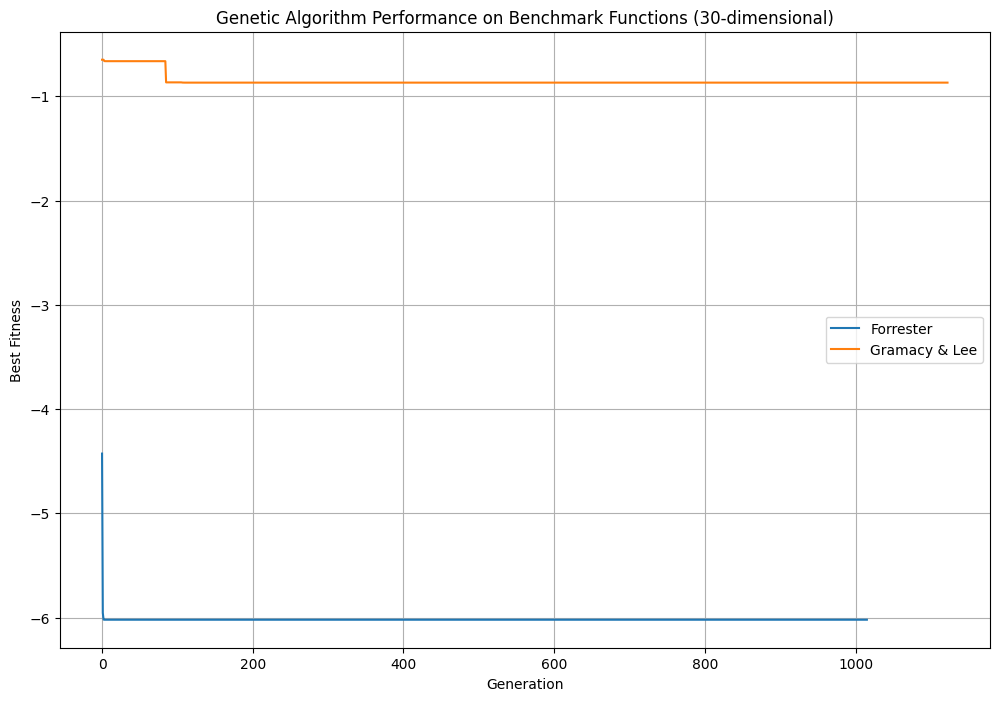

In [21]:
dimension = 1
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 1000

results = {}
for name, [func, bounds] in multimodal_1d.items():
    print(f"Running GA on {name}...")
    best_sol, fitness_history = genetic_algorithm(
        func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f" {name}: Best Fitness = {data['best_fitness']} ")


Summary Results:
 Forrester: Best Fitness = [-6.02074006] 
 Gramacy & Lee: Best Fitness = [-0.86901113] 


#### statistics

In [27]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in multimodal_1d.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running GA on {name}...")
        best_sol, fitness_history = genetic_algorithm(
            func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
        )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))


Running GA on Forrester...
Early stopping at generation 1017 (no improvement in 1000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running GA on Forrester...
Early stopping at generation 1017 (no improvement in 1000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running GA on Forrester...
Early stopping at generation 1013 (no improvement in 1000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running GA on Forrester...
Early stopping at generation 1015 (no improvement in 1000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running GA on Forrester...
Early stopping at generation 1016 (no improvement in 1000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running GA on Forrester...
Early stopping at generation 1013 (no improvement in 1000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006

#### table

In [ ]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

In [29]:
df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

In [30]:
df

,bench_func,avg,std,median
0,Forrester,-6.020740,8.881784e-16,-6.020740
1,Gramacy & Lee,-0.860161,3.857547e-02,-0.869011


### 2D

#### show output

Running GA on Adjiman...
Early stopping at generation 1276 (no improvement in 1000 generations)
Best solution for Adjiman: [2.         0.10582083] with fitness -2.0218067807194884
Running GA on Bartels Conn...
Early stopping at generation 1026 (no improvement in 1000 generations)
Best solution for Bartels Conn: [-9.81614853e-09 -1.12118366e-03] with fitness 1.000000638353622
Running GA on Beale...
Early stopping at generation 1036 (no improvement in 1000 generations)
Best solution for Beale: [3.05577841 0.45409806] with fitness 0.08005492560229212
Running GA on Bird...
Early stopping at generation 1394 (no improvement in 1000 generations)
Best solution for Bird: [-1.58935157 -3.1437983 ] with fitness -106.73235252644818
Running GA on Bohachevsky N. 2...
Early stopping at generation 1036 (no improvement in 1000 generations)
Best solution for Bohachevsky N. 2: [ 7.42307136e-05 -5.30259039e-05] with fitness 1.5115335300075472e-07
Running GA on Bukin N. 6...
Early stopping at generation 11

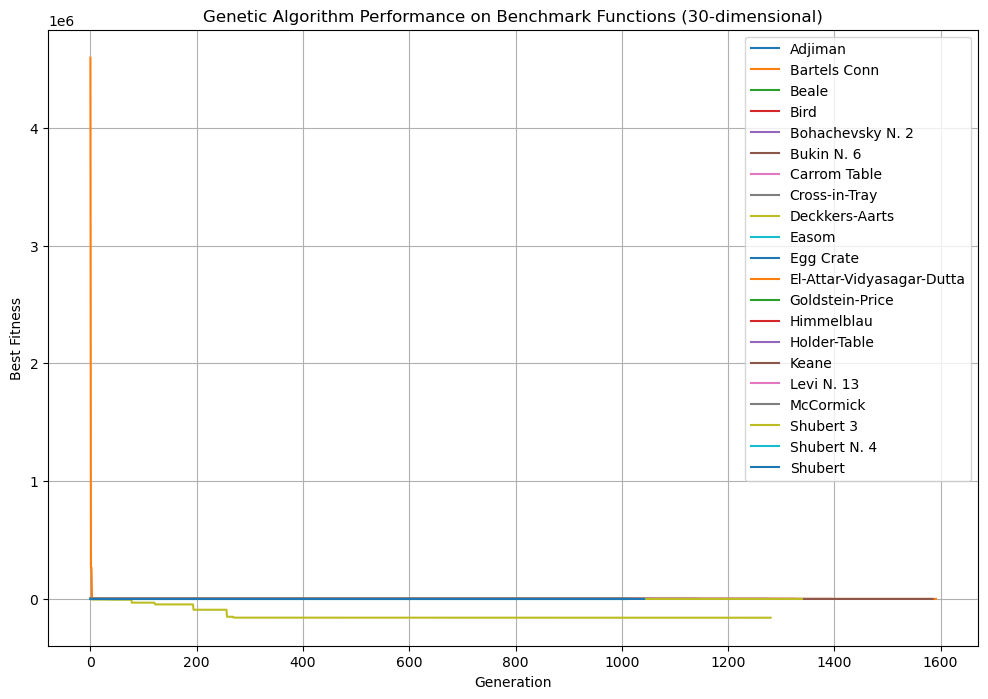

In [29]:
dimension = 2
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 1000

results = {}
for name, [func, bounds] in multimodal_2d.items():
    print(f"Running GA on {name}...")
    best_sol, fitness_history = genetic_algorithm(
        func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness']:.6e}")


Summary Results:
Adjiman             : Best Fitness = -2.021807e+00
Bartels Conn        : Best Fitness = 1.000001e+00
Beale               : Best Fitness = 8.005493e-02
Bird                : Best Fitness = -1.067324e+02
Bohachevsky N. 2    : Best Fitness = 1.511534e-07
Bukin N. 6          : Best Fitness = 2.291788e+02
Carrom Table        : Best Fitness = -5.378066e+00
Cross-in-Tray       : Best Fitness = -2.062612e+00
Deckkers-Aarts      : Best Fitness = -1.595908e+05
Easom               : Best Fitness = -9.103678e-01
Egg Crate           : Best Fitness = 7.046576e-03
El-Attar-Vidyasagar-Dutta: Best Fitness = 2.541098e+01
Goldstein-Price     : Best Fitness = 3.000003e+00
Himmelblau          : Best Fitness = 1.112855e-02
Holder-Table        : Best Fitness = -1.917677e+01
Keane               : Best Fitness = -6.736675e-01
Levi N. 13          : Best Fitness = 3.110528e-27
McCormick           : Best Fitness = -1.910508e+00
Shubert 3           : Best Fitness = -1.802568e+02
Shubert N. 4     

#### statistics

In [72]:
dimension = 2
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 10000

results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in multimodal_2d.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running GA on {name}...")
        best_sol, fitness_history = genetic_algorithm(
            func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
        )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))

Running GA on Adjiman...
Early stopping at generation 11259 (no improvement in 10000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness [-2.02180678]
Running GA on Adjiman...
Early stopping at generation 10071 (no improvement in 10000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness [-2.02180678]
Running GA on Adjiman...
Early stopping at generation 19956 (no improvement in 10000 generations)
Best solution for Adjiman: [ 1.46361577 -0.5761116 ] with fitness [-1.1571661]
Running GA on Adjiman...
Early stopping at generation 10299 (no improvement in 10000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness [-2.02180678]
Running GA on Adjiman...
Early stopping at generation 10076 (no improvement in 10000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness [-2.02180678]
Running GA on Adjiman...
Early stopping at generation 10047 (no improvement in 10000 generations)
Best solution for Adj

#### table

In [73]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

df

,bench_func,avg,std,median
0,Adjiman,-1.978575,1.884441e-01,-2.021807
1,Bartels Conn,1.069368,9.142294e-02,1.018774
2,Beale,0.038125,1.660843e-01,0.000003
3,Bird,-106.763825,6.752381e-04,-106.763984
4,Bohachevsky N. 2,0.021231,4.883533e-02,0.006821
5,Bukin N. 6,230.051004,3.801914e+00,229.178785
6,Carrom Table,-22.949039,5.263745e+00,-24.156745
7,Cross-in-Tray,-2.043851,8.176711e-02,-2.062611
8,Deckkers-Aarts,-24774.063191,5.422567e+00,-24776.366985
9,Easom,-0.997067,4.215317e-03,-0.998804


### 3D

#### show output

Running GA on Wolfe...
Early stopping at generation 1042 (no improvement in 1000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]


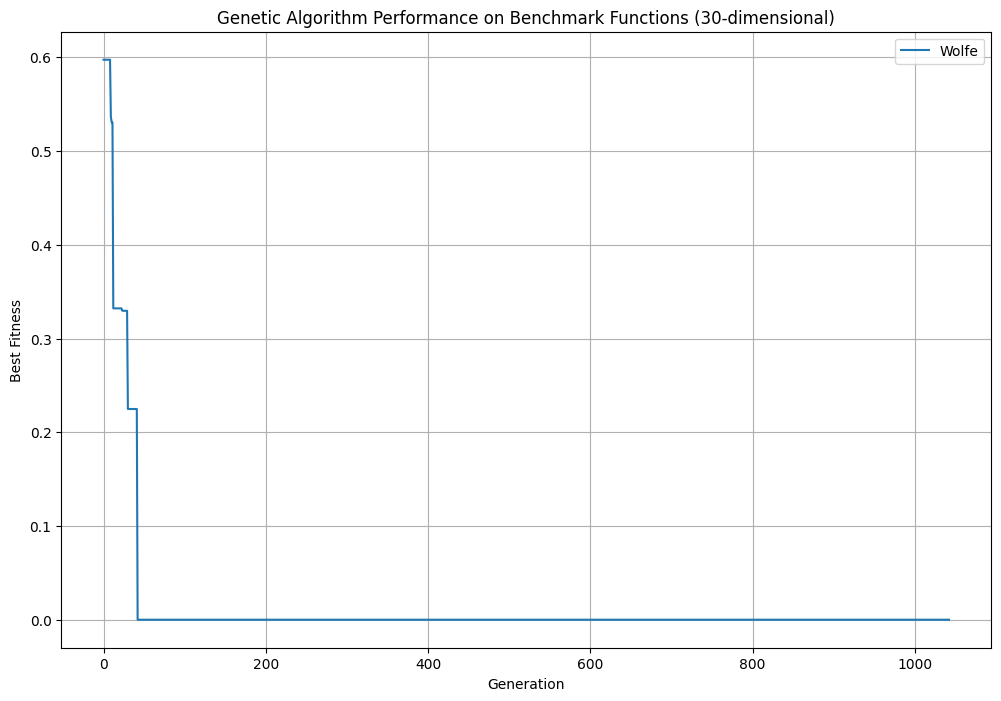

In [74]:
dimension = 3
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 1000

results = {}
for name, [func, bounds] in multimodal_3d.items():
    print(f"Running GA on {name}...")
    best_sol, fitness_history = genetic_algorithm(
        func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness']}")


Summary Results:
Wolfe               : Best Fitness = [0.]


#### statistics

In [77]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in multimodal_3d.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running GA on {name}...")
        best_sol, fitness_history = genetic_algorithm(
            func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
        )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))

Running GA on Wolfe...
Early stopping at generation 1011 (no improvement in 1000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running GA on Wolfe...
Early stopping at generation 1100 (no improvement in 1000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running GA on Wolfe...
Early stopping at generation 1052 (no improvement in 1000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running GA on Wolfe...
Early stopping at generation 1041 (no improvement in 1000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running GA on Wolfe...
Early stopping at generation 1088 (no improvement in 1000 generations)
Best solution for Wolfe: [0.43370319 0.25623871 0.        ] with fitness [0.30944673]
Running GA on Wolfe...
Early stopping at generation 1042 (no improvement in 1000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running GA on Wolfe...
Early stopping at generation 1026 (no improvement in 1000

#### table

In [78]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

df

,bench_func,avg,std,median
0,Wolfe,0.035561,0.107678,0.0


### nD

#### show output

Running GA on Alpine N. 1...
Early stopping at generation 3118 (no improvement in 3000 generations)
Best solution for Alpine N. 1: [5.00124748 7.42448072 3.35745549 2.06324245 3.46587433 5.95688516
 3.8860729  4.06005139 4.35636945 6.28949889 5.23156182 2.6772288
 5.38320675 5.1904269  2.81214127 6.49043995 2.06873063 2.79879798
 9.35931047 3.02890479 5.35963975 3.31432394 4.40318825 2.28035491
 3.05213593 7.30771835 2.82670059 8.54655909 4.40565981 3.12186964] with fitness [0.]
Running GA on Alpine N. 2...
Best solution for Alpine N. 2: [4.97607834 4.88143401 4.63943006 8.10385719 2.07325622 4.94308547
 4.64677789 1.78524319 4.72727407 4.89537506 4.73445443 7.87745807
 4.7489292  4.91082816 4.8353678  7.96805332 4.94351702 4.70205482
 1.75604191 4.8947058  4.86747832 4.98616634 7.7707148  4.74552223
 4.73441134 5.06505657 7.70612733 4.87031871 4.76213091 7.95695627] with fitness [-1.12929255e+10]
Running GA on Happy Cat...
Early stopping at generation 8375 (no improvement in 3000 gene

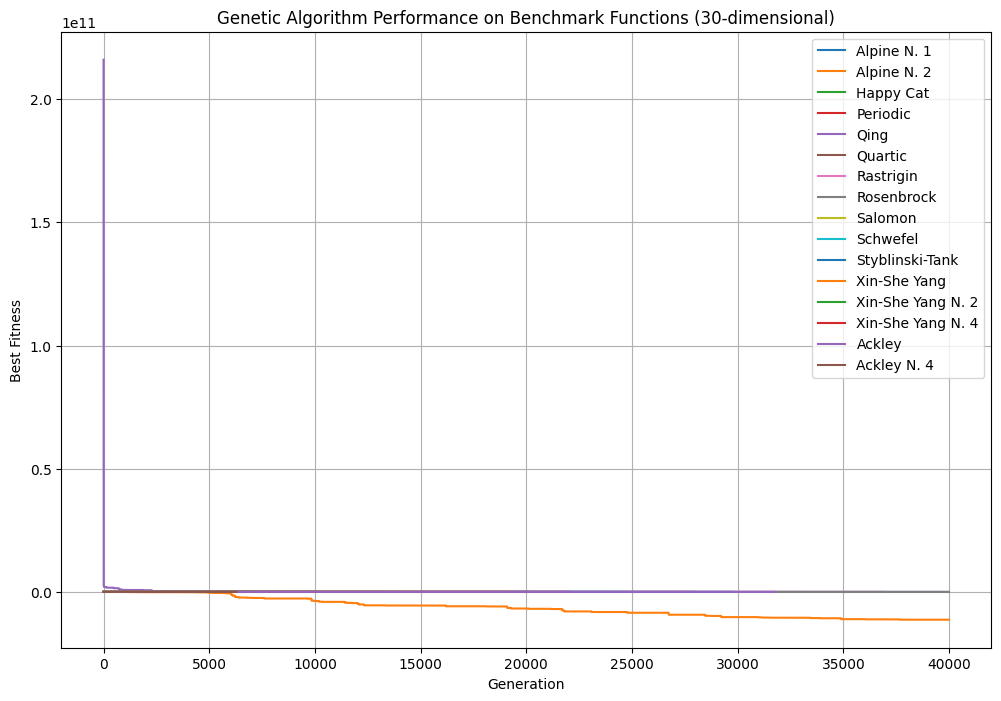

In [82]:
dimension = 30
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 3000

results = {}
for name, [func, bounds] in multimodal_30d.items():
    print(f"Running GA on {name}...")
    best_sol, fitness_history = genetic_algorithm(
        func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness']}")


Summary Results:
Alpine N. 1         : Best Fitness = [0.]
Alpine N. 2         : Best Fitness = [-1.12929255e+10]
Happy Cat           : Best Fitness = [0.54730762]
Periodic            : Best Fitness = [2.84864295]
Qing                : Best Fitness = [11073117.6157046]
Quartic             : Best Fitness = [-0.94861889]
Rastrigin           : Best Fitness = [61.24353469]
Rosenbrock          : Best Fitness = [450.93137678]
Salomon             : Best Fitness = [4.29987335]
Schwefel            : Best Fitness = [6199.67344301]
Styblinski-Tank     : Best Fitness = [-1027.2290023]
Xin-She Yang        : Best Fitness = [1.00007565e-10]
Xin-She Yang N. 2   : Best Fitness = [1.27078171e-07]
Xin-She Yang N. 4   : Best Fitness = [1.02952585e-12]
Ackley              : Best Fitness = [8.07606492]
Ackley N. 4         : Best Fitness = [53.5113064]


#### statistics

In [84]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in multimodal_30d.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running GA on {name}...")
        best_sol, fitness_history = genetic_algorithm(
            func, bounds, dimension, pop_size, crossover_rate, mutation_rate, max_generation, patience
        )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))

Running GA on Alpine N. 1...
Early stopping at generation 3033 (no improvement in 3000 generations)
Best solution for Alpine N. 1: [3.17697548 6.48392548 3.77415377 6.06288873 1.54429817 8.58929242
 6.18350606 4.76940246 2.43839517 4.45754979 5.09539865 0.38500143
 8.95177527 6.37992183 3.3444503  5.04855636 2.03630086 6.2809547
 4.86407179 5.6676791  0.91375834 2.52269491 3.64928917 7.00033113
 3.57629928 0.34932484 4.25121653 2.76433389 6.51974915 3.5053812 ] with fitness [0.]
Running GA on Alpine N. 1...
Early stopping at generation 3040 (no improvement in 3000 generations)
Best solution for Alpine N. 1: [3.57224323 2.67523435 3.39685206 4.87716052 6.73077345 5.42879252
 2.38862282 4.41116855 5.70383671 4.86821952 4.9161476  2.31095226
 5.24462662 3.59887895 2.76087247 4.90500409 2.0520802  5.61108401
 3.84100394 7.13519533 3.05499716 4.8353088  7.81489078 5.46675464
 1.14393187 2.9807905  3.38236349 6.74418994 7.04364886 7.90373763] with fitness [0.]
Running GA on Alpine N. 1...
Ea

#### table

In [85]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

df

,bench_func,avg,std,median
0,Alpine N. 1,1.486909e-05,6.481267e-05,0.000000e+00
1,Alpine N. 2,-3.695249e+10,4.052547e+10,-2.102414e+10
2,Happy Cat,4.392775e-01,1.747732e-01,3.644878e-01
3,Periodic,3.986463e+00,1.242794e+00,3.854434e+00
4,Qing,1.158208e+07,2.525931e+07,4.517070e+06
5,Quartic,1.128609e+00,5.707556e+00,-1.195533e-01
6,Rastrigin,1.175614e+02,3.347818e+01,1.122347e+02
7,Rosenbrock,7.413092e+02,4.434638e+02,5.981001e+02
8,Salomon,6.723343e+00,4.182253e+00,5.699873e+00
9,Schwefel,6.841520e+03,6.832202e+02,6.714211e+03


# PSO

In [ ]:
import numpy as np

class Particle:
    def __init__(self, bounds, dimension, func):
        self.position = np.random.uniform(bounds[0], bounds[1], dimension)
        self.velocity = np.random.uniform(-abs(bounds[1]-bounds[0]), abs(bounds[1]-bounds[0]), dimension)
        self.best_position = np.copy(self.position)
        self.fitness = func([self.position])
        self.best_fitness = self.fitness

def pso(func, bounds, dimension=30, pop_size=50, w=0.7, c1=1.5, c2=1.5, max_generation=40000, patience=1000):
    # --- Initialization
    swarm = [Particle(bounds, dimension, func) for _ in range(pop_size)]
    global_best = min(swarm, key=lambda p: p.fitness)
    best_position = np.copy(global_best.position)
    best_fitness = global_best.fitness
    
    fitness_history = [best_fitness]
    no_improve_count = 0

    # --- Main loop
    for gen in range(1, max_generation + 1):
        for particle in swarm:
            # Update velocity
            r1, r2 = np.random.rand(dimension), np.random.rand(dimension)
            cognitive = c1 * r1 * (particle.best_position - particle.position)
            social = c2 * r2 * (best_position - particle.position)
            particle.velocity = w * particle.velocity + cognitive + social

            # Update position
            particle.position += particle.velocity
            # Keep inside bounds
            particle.position = np.clip(particle.position, bounds[0], bounds[1])

            # Evaluate
            particle.fitness = func([particle.position])

            # Update personal best
            if particle.fitness[0] < particle.best_fitness:
                particle.best_fitness = particle.fitness
                particle.best_position = np.copy(particle.position)

        # Update global best
        current_best = min(swarm, key=lambda p: p.fitness)
        if current_best.fitness < best_fitness:
            best_fitness = current_best.fitness
            best_position = np.copy(current_best.position)
            no_improve_count = 0
        else:
            no_improve_count += 1

        fitness_history.append(best_fitness)

        # Early stopping
        if no_improve_count >= patience:
            print(f"Early stopping at generation {gen} (no improvement in {patience} generations)")
            break

    class BestSolution:
        def __init__(self, values, fitness):
            self.values = values
            self.fitness = fitness

    return BestSolution(best_position, best_fitness), fitness_history


# PSO results

## uni

### 2D

Running PSO on AckleyN2...
Early stopping at generation 3334 (no improvement in 3000 generations)
Best solution for AckleyN2: [1.49763082e-15 2.19236331e-15] with fitness [-200.]
Running PSO on BohachevskyN1...
Early stopping at generation 3191 (no improvement in 3000 generations)
Best solution for BohachevskyN1: [ 2.80108852e-09 -6.80703730e-10] with fitness [0.]
Running PSO on Booth...
Early stopping at generation 3348 (no improvement in 3000 generations)
Best solution for Booth: [1. 3.] with fitness [0.]
Running PSO on Brent...
Early stopping at generation 3322 (no improvement in 3000 generations)
Best solution for Brent: [-10. -10.] with fitness [1.38389653e-87]
Running PSO on dropwave...
Early stopping at generation 3190 (no improvement in 3000 generations)
Best solution for dropwave: [ 5.42540176e-10 -8.86631784e-10] with fitness [-1.]
Running PSO on Exponential...
Early stopping at generation 3126 (no improvement in 3000 generations)
Best solution for Exponential: [-2.43217292e-

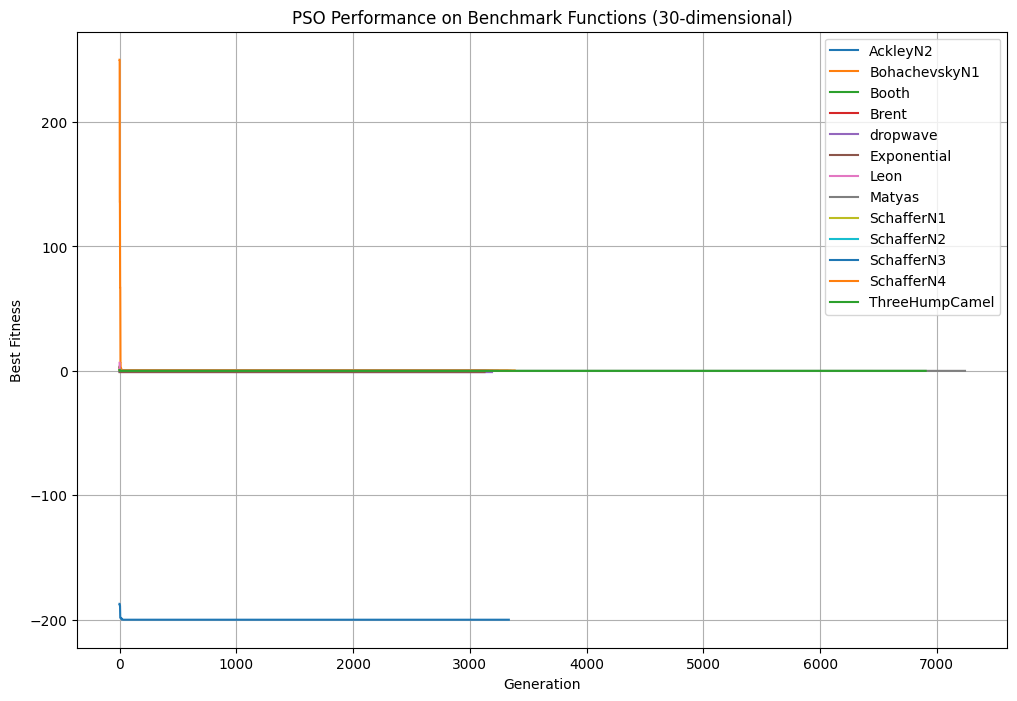

In [87]:
# Parameters
dimension = 2
pop_size = 50
max_generation = 40000
patience = 3000

results = {}
for name, [func, bounds] in unimodal_functions2D.items():
    print(f"Running PSO on {name}...")
    best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

# Plot results
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('PSO Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness']}")


Summary Results:
AckleyN2            : Best Fitness = [-200.]
BohachevskyN1       : Best Fitness = [0.]
Booth               : Best Fitness = [0.]
Brent               : Best Fitness = [1.38389653e-87]
dropwave            : Best Fitness = [-1.]
Exponential         : Best Fitness = [-1.]
Leon                : Best Fitness = [0.56283546]
Matyas              : Best Fitness = [0.]
SchafferN1          : Best Fitness = [0.]
SchafferN2          : Best Fitness = [0.]
SchafferN3          : Best Fitness = [0.00156685]
SchafferN4          : Best Fitness = [0.29257863]
ThreeHumpCamel      : Best Fitness = [0.]


#### statistics

In [89]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in unimodal_functions2D.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running PSO on {name}...")
        best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))


Running PSO on AckleyN2...
Early stopping at generation 3296 (no improvement in 3000 generations)
Best solution for AckleyN2: [ 1.75830456e-15 -1.27844294e-15] with fitness [-200.]
Running PSO on AckleyN2...
Early stopping at generation 3302 (no improvement in 3000 generations)
Best solution for AckleyN2: [1.01252048e-15 2.53059119e-15] with fitness [-200.]
Running PSO on AckleyN2...
Early stopping at generation 3314 (no improvement in 3000 generations)
Best solution for AckleyN2: [-1.80446501e-16 -9.41493250e-16] with fitness [-200.]
Running PSO on AckleyN2...
Early stopping at generation 3311 (no improvement in 3000 generations)
Best solution for AckleyN2: [ 2.76188264e-15 -2.00585057e-16] with fitness [-200.]
Running PSO on AckleyN2...
Early stopping at generation 3313 (no improvement in 3000 generations)
Best solution for AckleyN2: [ 1.11968864e-16 -1.91567954e-15] with fitness [-200.]
Running PSO on AckleyN2...
Early stopping at generation 3309 (no improvement in 3000 generations)

#### table

In [90]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

df

,bench_func,avg,std,median
0,AckleyN2,-2.000000e+02,0.000000e+00,-2.000000e+02
1,BohachevskyN1,0.000000e+00,0.000000e+00,0.000000e+00
2,Booth,0.000000e+00,0.000000e+00,0.000000e+00
3,Brent,1.383897e-87,2.232397e-103,1.383897e-87
4,dropwave,-1.000000e+00,0.000000e+00,-1.000000e+00
5,Exponential,-1.000000e+00,0.000000e+00,-1.000000e+00
6,Leon,4.158430e-01,2.880694e-01,5.628355e-01
7,Matyas,0.000000e+00,0.000000e+00,0.000000e+00
8,SchafferN1,0.000000e+00,0.000000e+00,0.000000e+00
9,SchafferN2,0.000000e+00,0.000000e+00,0.000000e+00


### nD

Running PSO on Brown...
Early stopping at generation 3476 (no improvement in 3000 generations)
Best solution for Brown: [-7.07974303e-10  1.15283587e-09  1.25471952e-08 -3.08908847e-09
 -2.94751098e-09 -8.26935810e-09  8.60401054e-09 -1.00000000e+00
  3.52751136e-09  1.12863646e-08  7.01226148e-09 -1.60464311e-08
  1.35701908e-08 -1.77823599e-08 -1.00000000e+00  7.84313709e-05
 -1.00000000e+00  1.73963224e-08  4.16166472e-09 -1.06117197e-08
 -1.00000000e+00 -1.00000000e+00 -2.01133686e-08  1.36942001e-08
 -1.17846767e-08 -1.00000000e+00 -1.00000000e+00  9.20063009e-05
 -1.00000000e+00 -1.00000000e+00] with fitness 1.700000e+01
Running PSO on Griewank...
Early stopping at generation 5831 (no improvement in 3000 generations)
Best solution for Griewank: [ 6.28004441e+00 -4.43844326e+00  4.35212343e-09 -1.73246107e-08
 -1.38963772e-08 -5.44677638e-09  2.14973664e-08  1.69163054e-08
 -1.01010323e-08  2.42954550e-08 -1.85123821e-08  1.28132823e-08
  6.54523446e-10 -6.38765701e-09 -1.20767513

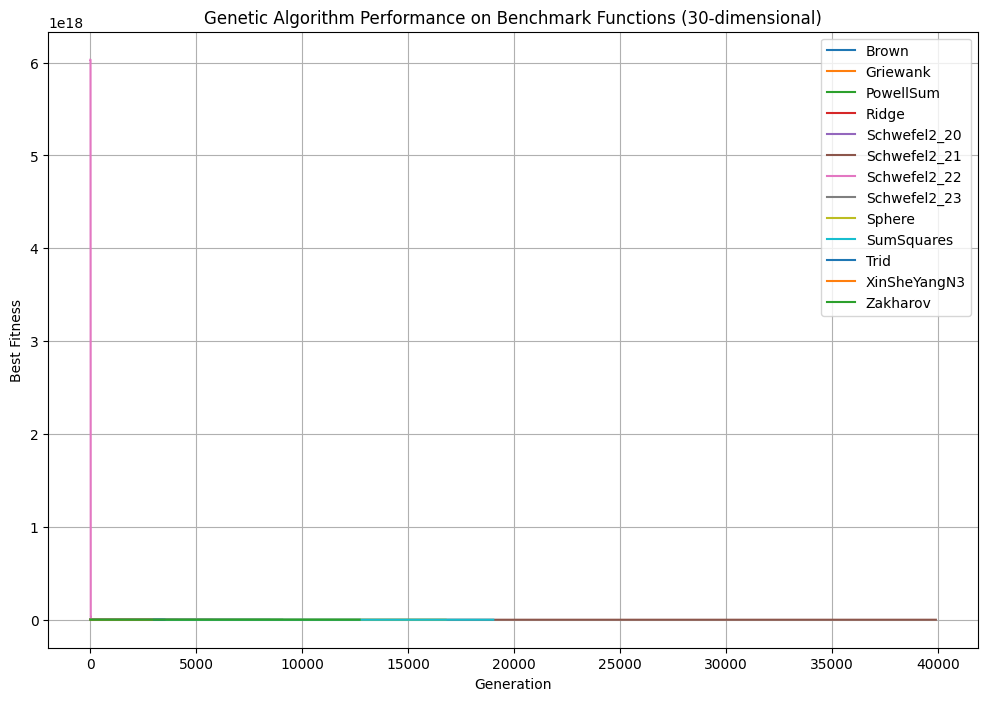

In [91]:
dimension = 30
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 3000

results = {}
for name, [func, bounds] in unimodal_functions30D.items():
    print(f"Running PSO on {name}...")

    best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness[0]:.6e}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'][100:], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness']}")


Summary Results:
Brown               : Best Fitness = [17.]
Griewank            : Best Fitness = [0.05153003]
PowellSum           : Best Fitness = [0.]
Ridge               : Best Fitness = [-5.]
Schwefel2_20        : Best Fitness = [100.]
Schwefel2_21        : Best Fitness = [4.09445492e-67]
Schwefel2_22        : Best Fitness = [200.00000001]
Schwefel2_23        : Best Fitness = [0.]
Sphere              : Best Fitness = [0.]
SumSquares          : Best Fitness = [0.]
Trid                : Best Fitness = [-244.66666667]
XinSheYangN3        : Best Fitness = [0.99502349]
Zakharov            : Best Fitness = [25.78789543]


#### statistics

In [ ]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in unimodal_functions30D.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running PSO on {name}...")
        best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))

Running PSO on Brown...
Early stopping at generation 3541 (no improvement in 3000 generations)
Best solution for Brown: [-1.00000000e+00 -1.38775649e-08 -9.02698208e-10  3.35531019e-09
  1.28477650e-08  1.18903187e-08  1.37282776e-08 -7.44764534e-09
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -8.67951426e-09
 -1.90712349e-08 -8.20184447e-09 -6.76255954e-09 -9.55976402e-09
 -6.59350763e-09  8.24404588e-09 -6.55218222e-09 -1.70182442e-08
 -4.98501821e-09  1.86059590e-08  7.56953280e-10  1.57142620e-09
  1.65828670e-09 -1.01432658e-08  1.73638655e-08 -1.00000000e+00
  1.42679316e-04 -1.00000000e+00] with fitness [10.]
Running PSO on Brown...
Early stopping at generation 3685 (no improvement in 3000 generations)
Best solution for Brown: [ 1.65688886e-08  2.27035418e-09 -1.00000000e+00 -1.65241537e-08
 -8.25117340e-09 -9.96228665e-09 -4.66542350e-09  7.68625972e-09
  3.27940131e-10 -1.74618591e-09 -1.07409655e-08 -1.00000000e+00
 -1.68706710e-08 -1.08056575e-08 -1.52643199e-08 -4.94041

#### table

In [94]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

df

,bench_func,avg,std,median
0,Brown,3.060000e+01,1.815874e+01,2.300000e+01
1,Griewank,4.532022e+00,1.962257e+01,2.090716e-02
2,PowellSum,0.000000e+00,0.000000e+00,0.000000e+00
3,Ridge,-3.646447e+00,2.380734e+00,-5.000000e+00
4,Schwefel2_20,1.000000e+02,8.944272e+01,1.000000e+02
5,Schwefel2_21,1.496970e-65,4.715490e-65,9.630597e-69
6,Schwefel2_22,2.999608e+02,1.378122e+02,3.000000e+02
7,Schwefel2_23,0.000000e+00,0.000000e+00,0.000000e+00
8,Sphere,0.000000e+00,0.000000e+00,0.000000e+00
9,SumSquares,2.750000e+02,3.476708e+02,1.500000e+02


## multi

### 1D

Running PSO on Forrester...
Early stopping at generation 3124 (no improvement in 3000 generations)
Best solution for Forrester: [0.75724876] with fitness -6.020740e+00
Running PSO on Gramacy & Lee...
Early stopping at generation 3118 (no improvement in 3000 generations)
Best solution for Gramacy & Lee: [0.54856344] with fitness -8.690111e-01


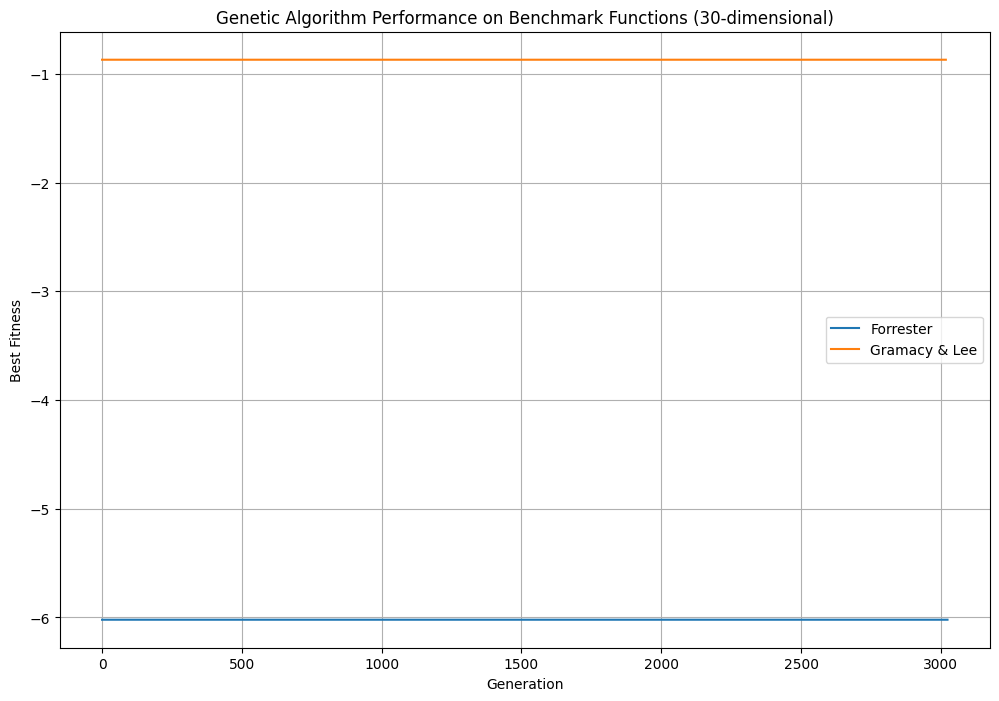

In [95]:
dimension = 1
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 3000

results = {}
for name, [func, bounds] in multimodal_1d.items():
    print(f"Running PSO on {name}...")

    best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness[0]:.6e}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'][100:], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness']}")


Summary Results:
Forrester           : Best Fitness = [-6.02074006]
Gramacy & Lee       : Best Fitness = [-0.86901113]


#### statistics

In [97]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in multimodal_1d.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running PSO on {name}...")
        best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))


Running PSO on Forrester...
Early stopping at generation 3113 (no improvement in 3000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running PSO on Forrester...
Early stopping at generation 3126 (no improvement in 3000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running PSO on Forrester...
Early stopping at generation 3128 (no improvement in 3000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running PSO on Forrester...
Early stopping at generation 3104 (no improvement in 3000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running PSO on Forrester...
Early stopping at generation 3114 (no improvement in 3000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02074006]
Running PSO on Forrester...
Early stopping at generation 3098 (no improvement in 3000 generations)
Best solution for Forrester: [0.75724876] with fitness [-6.02

#### table

In [98]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

df

,bench_func,avg,std,median
0,Forrester,-6.020740,8.881784e-16,-6.020740
1,Gramacy & Lee,-0.869011,1.110223e-16,-0.869011


### 2D

Running PSO on Adjiman...
Early stopping at generation 3176 (no improvement in 3000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness -2.021807e+00
Running PSO on Bartels Conn...
Early stopping at generation 3305 (no improvement in 3000 generations)
Best solution for Bartels Conn: [ 5.52054583e-17 -5.66460920e-09] with fitness 1.000000e+00
Running PSO on Beale...
Early stopping at generation 3404 (no improvement in 3000 generations)
Best solution for Beale: [3.  0.5] with fitness 0.000000e+00
Running PSO on Bird...
Early stopping at generation 3311 (no improvement in 3000 generations)
Best solution for Bird: [4.70104313 3.15293851] with fitness -1.067645e+02
Running PSO on Bohachevsky N. 2...
Early stopping at generation 3197 (no improvement in 3000 generations)
Best solution for Bohachevsky N. 2: [-8.67924742e-10  1.92045984e-10] with fitness 0.000000e+00
Running PSO on Bukin N. 6...
Early stopping at generation 3001 (no improvement in 3000 generations)
Best

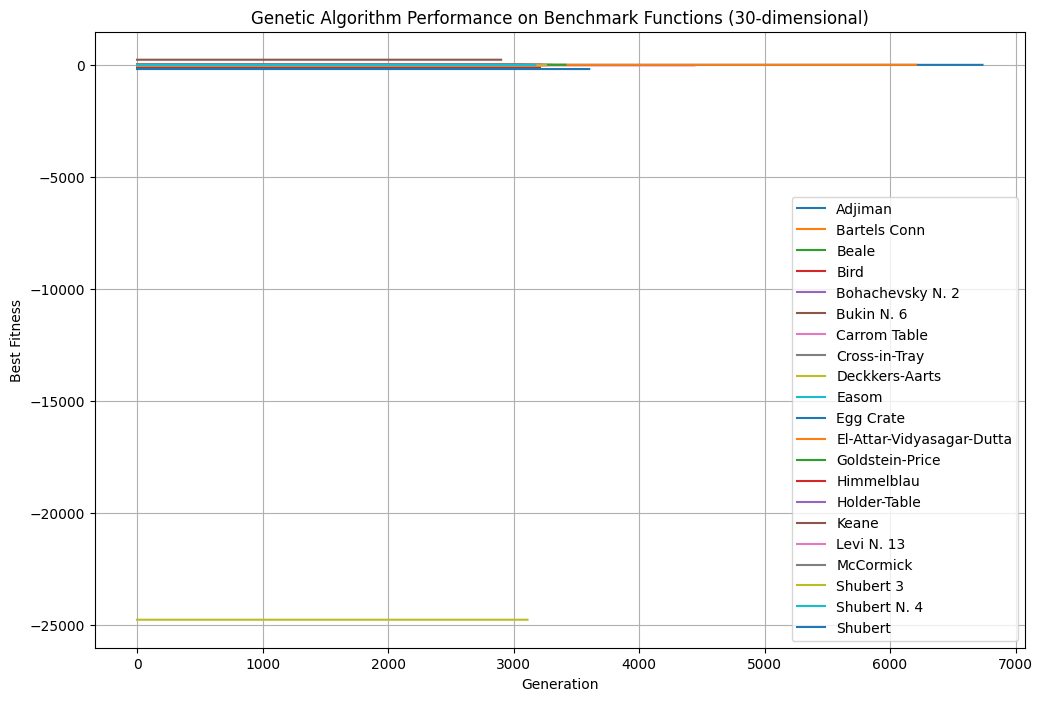

In [99]:
dimension = 2
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 3000

results = {}
for name, [func, bounds] in multimodal_2d.items():
    print(f"Running PSO on {name}...")

    best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness[0]:.6e}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'][100:], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness']}")


Summary Results:
Adjiman             : Best Fitness = [-2.02180678]
Bartels Conn        : Best Fitness = [1.]
Beale               : Best Fitness = [0.]
Bird                : Best Fitness = [-106.76453675]
Bohachevsky N. 2    : Best Fitness = [0.]
Bukin N. 6          : Best Fitness = [229.17878475]
Carrom Table        : Best Fitness = [-24.15681555]
Cross-in-Tray       : Best Fitness = [-2.06261187]
Deckkers-Aarts      : Best Fitness = [-24776.51834232]
Easom               : Best Fitness = [-1.]
Egg Crate           : Best Fitness = [0.]
El-Attar-Vidyasagar-Dutta: Best Fitness = [1.71278035]
Goldstein-Price     : Best Fitness = [3.]
Himmelblau          : Best Fitness = [7.88860905e-31]
Holder-Table        : Best Fitness = [-18.02071663]
Keane               : Best Fitness = [-0.67366752]
Levi N. 13          : Best Fitness = [1.3497838e-31]
McCormick           : Best Fitness = [-1.91050755]
Shubert 3           : Best Fitness = [-29.67590005]
Shubert N. 4        : Best Fitness = [-7.655939

#### statistics

In [101]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in multimodal_2d.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running PSO on {name}...")
        best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))


Running PSO on Adjiman...
Early stopping at generation 3176 (no improvement in 3000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness [-2.02180678]
Running PSO on Adjiman...
Early stopping at generation 3171 (no improvement in 3000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness [-2.02180678]
Running PSO on Adjiman...
Early stopping at generation 3223 (no improvement in 3000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness [-2.02180678]
Running PSO on Adjiman...
Early stopping at generation 3187 (no improvement in 3000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness [-2.02180678]
Running PSO on Adjiman...
Early stopping at generation 3178 (no improvement in 3000 generations)
Best solution for Adjiman: [2.         0.10578347] with fitness [-2.02180678]
Running PSO on Adjiman...
Early stopping at generation 3242 (no improvement in 3000 generations)
Best solution for Adjiman: [

#### table

In [102]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

df

,bench_func,avg,std,median
0,Adjiman,-2.021807e+00,4.440892e-16,-2.021807e+00
1,Bartels Conn,1.000000e+00,0.000000e+00,1.000000e+00
2,Beale,0.000000e+00,0.000000e+00,0.000000e+00
3,Bird,-1.067645e+02,1.348160e-14,-1.067645e+02
4,Bohachevsky N. 2,0.000000e+00,0.000000e+00,0.000000e+00
5,Bukin N. 6,2.291788e+02,0.000000e+00,2.291788e+02
6,Carrom Table,-2.415682e+01,4.423093e-15,-2.415682e+01
7,Cross-in-Tray,-2.062612e+00,4.440892e-16,-2.062612e+00
8,Deckkers-Aarts,-2.477652e+04,3.637979e-12,-2.477652e+04
9,Easom,-1.000000e+00,0.000000e+00,-1.000000e+00


### 3D

Running PSO on Wolfe...
Early stopping at generation 3001 (no improvement in 3000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness 0.000000e+00


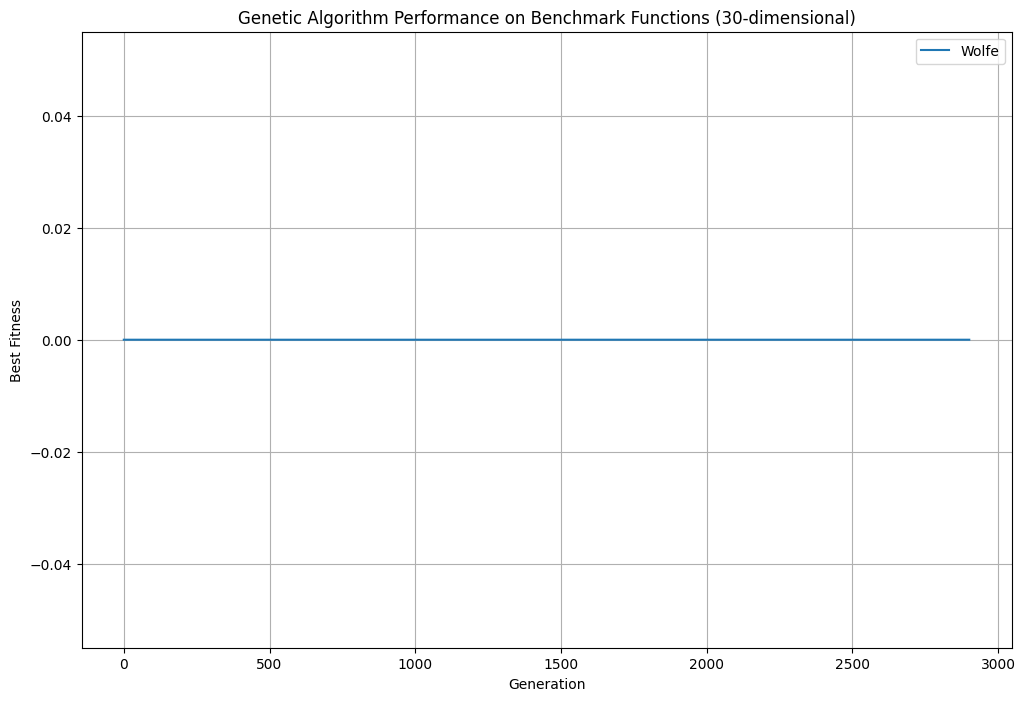

In [103]:
dimension = 3
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 3000

results = {}
for name, [func, bounds] in multimodal_3d.items():
    print(f"Running PSO on {name}...")

    best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness[0]:.6e}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'][100:], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness']}")


Summary Results:
Wolfe               : Best Fitness = [0.]


#### statistics

In [105]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in multimodal_3d.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running PSO on {name}...")
        best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))


Running PSO on Wolfe...
Early stopping at generation 3001 (no improvement in 3000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running PSO on Wolfe...
Early stopping at generation 3002 (no improvement in 3000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running PSO on Wolfe...
Early stopping at generation 3001 (no improvement in 3000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running PSO on Wolfe...
Early stopping at generation 3001 (no improvement in 3000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running PSO on Wolfe...
Early stopping at generation 3001 (no improvement in 3000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running PSO on Wolfe...
Early stopping at generation 3001 (no improvement in 3000 generations)
Best solution for Wolfe: [0. 0. 0.] with fitness [0.]
Running PSO on Wolfe...
Early stopping at generation 3001 (no improvement in 3000 generations)
Best soluti

#### table

In [106]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

df

,bench_func,avg,std,median
0,Wolfe,0.0,0.0,0.0


### 30D

Running PSO on Alpine N. 1...
Early stopping at generation 3514 (no improvement in 3000 generations)
Best solution for Alpine N. 1: [10.         10.          4.38735932  0.          8.83943195  8.46666181
  0.8743406   3.58197295  5.4538615   0.51382271  3.40474568  1.79577659
  5.40002593  8.44817308  5.22092398  6.56061202  6.07908666  4.24142606
  5.04756586  2.10471114  2.38057256  3.90396342 10.          7.24342347
  0.          9.99444807  0.          9.23460423  7.83190264  4.44113913] with fitness 0.000000e+00
Running PSO on Alpine N. 2...
Early stopping at generation 4279 (no improvement in 3000 generations)
Best solution for Alpine N. 2: [10.         10.          4.81584233 10.          7.91705268  7.91705269
 10.          4.81584233  4.81584231 10.          4.81584232  7.91705268
  4.81584231  4.81584232  7.91705269 10.          4.81584232  4.8158423
  7.9170527   4.81584231  7.91705269  4.81584231  4.81584233  7.91705269
  7.91705268  7.9170527   7.91705268 10.          4.8

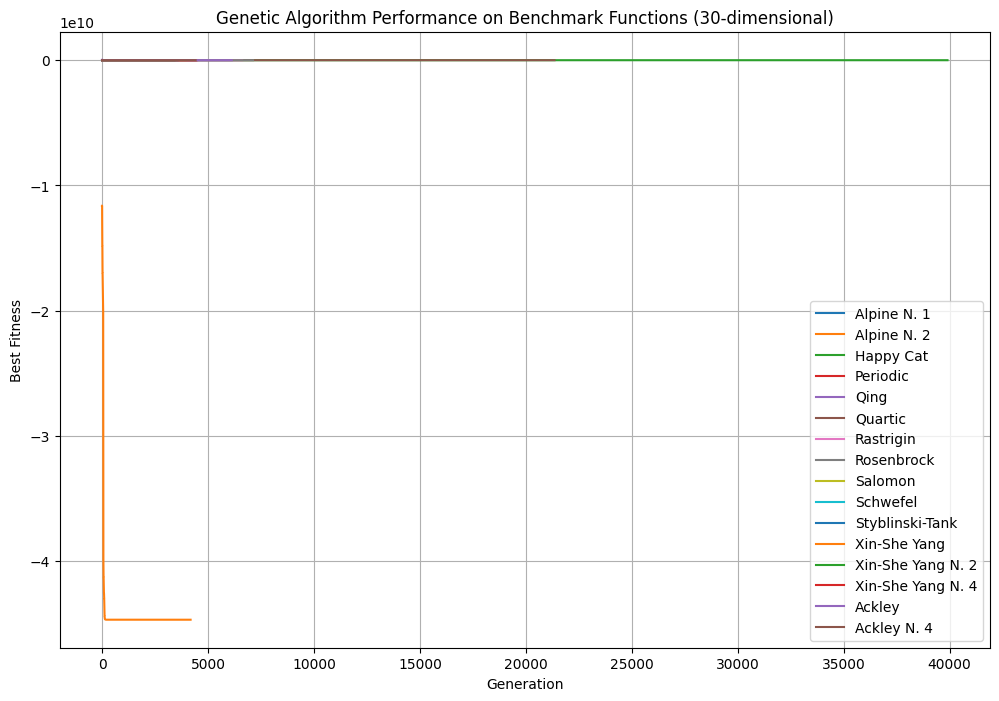

In [107]:
dimension = 30
pop_size = 50
crossover_rate = 0.75
mutation_rate = 0.01
max_generation = 40000
patience = 3000

results = {}
for name, [func, bounds] in multimodal_30d.items():
    print(f"Running PSO on {name}...")

    best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
    results[name] = {
        'best_solution': best_sol.values,
        'best_fitness': best_sol.fitness,
        'fitness_history': fitness_history
    }
    print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness[0]:.6e}")

# Plot fitness history for each function
plt.figure(figsize=(12, 8))
for name, data in results.items():
    plt.plot(data['fitness_history'][100:], label=name)

plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance on Benchmark Functions (30-dimensional)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nSummary Results:")
print("=" * 60)
for name, data in results.items():
    print(f"{name:20}: Best Fitness = {data['best_fitness']}")


Summary Results:
Alpine N. 1         : Best Fitness = [0.]
Alpine N. 2         : Best Fitness = [-4.4668028e+10]
Happy Cat           : Best Fitness = [0.01837216]
Periodic            : Best Fitness = [3.66363072]
Qing                : Best Fitness = [1.57377751e-28]
Quartic             : Best Fitness = [-0.99632063]
Rastrigin           : Best Fitness = [95.5156039]
Rosenbrock          : Best Fitness = [113682.82883448]
Salomon             : Best Fitness = [0.69987335]
Schwefel            : Best Fitness = [2333.84425298]
Styblinski-Tank     : Best Fitness = [-1061.89121873]
Xin-She Yang        : Best Fitness = [6.33071794e-12]
Xin-She Yang N. 2   : Best Fitness = [3.06217226e-11]
Xin-She Yang N. 4   : Best Fitness = [1.40279045e-43]
Ackley              : Best Fitness = [2.81359698]
Ackley N. 4         : Best Fitness = [75.76090188]


#### statistics

In [109]:
results = {}
all_func_names = []
all_fits_avg = []
all_fits_median = []
all_fits_std = []


for name, [func, bounds] in multimodal_30d.items():
    best_fits = []
    for _ in range(20):
            
        print(f"Running PSO on {name}...")
        best_sol, fitness_history = pso(
        func, bounds, dimension, pop_size, 
        w=0.74, c1=1.42, c2=1.42, 
        max_generation=max_generation, patience=patience
    )
        results[name] = {
            'best_solution': best_sol.values,
            'best_fitness': best_sol.fitness,
            'fitness_history': fitness_history
        }
        print(f"Best solution for {name}: {best_sol.values} with fitness {best_sol.fitness}")

        best_fits.append(best_sol.fitness)

    print(f"{best_fits[0]}\n{best_fits[1]}\n{best_fits[-1]}\n mean is : {np.mean(best_fits)}\n std is : {np.std(best_fits)} ")

    all_func_names.append(name)
    all_fits_avg.append(np.mean(best_fits))
    all_fits_median.append(np.median(best_fits))
    all_fits_std.append(np.std(best_fits))


Running PSO on Alpine N. 1...
Early stopping at generation 3421 (no improvement in 3000 generations)
Best solution for Alpine N. 1: [ 9.92568816  3.91721719  7.57603598  9.90147467  9.83755714  4.87987053
  0.          5.57678004  2.66520645  0.          0.34355545  0.08405177
  0.27114549  0.          8.48843018 10.          0.64437209  3.28913406
  7.62832555  4.52780723  0.65305446  7.79833796  9.75301522 10.
  9.8283561   8.24389086  4.58744161  9.44347671  3.86697556  0.        ] with fitness [8.8817842e-16]
Running PSO on Alpine N. 1...
Early stopping at generation 3412 (no improvement in 3000 generations)
Best solution for Alpine N. 1: [ 2.96973235  0.          5.45471435 10.          0.          2.36864098
  6.99612554  4.35649578  4.6316329   5.59843571  9.91543905  3.45783134
  2.78317429  4.64213366  5.1865474   0.          6.90900353  1.92528568
  4.35938812  3.26780524  6.28674278  3.35788591  0.42736352  4.29597066
  0.42727637  7.51458766  8.49451775  0.776375    8.52915

#### table

In [110]:
df = pd.DataFrame(columns=["bench_func", "avg", "std", "median"])

df["bench_func"] = all_func_names
df["avg"] = all_fits_avg
df["std"] = all_fits_std
df["median"] = all_fits_median

df

,bench_func,avg,std,median
0,Alpine N. 1,1.595577e-15,1.819629e-15,8.881784e-16
1,Alpine N. 2,-1.216079e+11,1.703152e+11,-5.490565e+10
2,Happy Cat,4.252525e-03,6.839067e-03,9.343147e-04
3,Periodic,3.841206e+00,6.966047e-01,3.811610e+00
4,Qing,1.516980e-28,5.241837e-29,1.195124e-28
5,Quartic,-3.268784e-01,1.873842e+00,-9.979530e-01
6,Rastrigin,1.222550e+02,3.366138e+01,1.170493e+02
7,Rosenbrock,7.276672e+04,6.587479e+04,5.802487e+04
8,Salomon,1.899873e+00,3.503141e+00,3.998733e-01
9,Schwefel,3.910624e+03,8.780687e+02,3.905356e+03
